In [86]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [87]:
file_path = '/content/parkinsson.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [88]:
# One-hot encoding for all categorical columns
df = pd.get_dummies(df)

# Display the updated DataFrame
print(df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   name_phon_R01_S49_3  name_phon_R01_S49_4  name_phon_R01_S49_5  \
0     

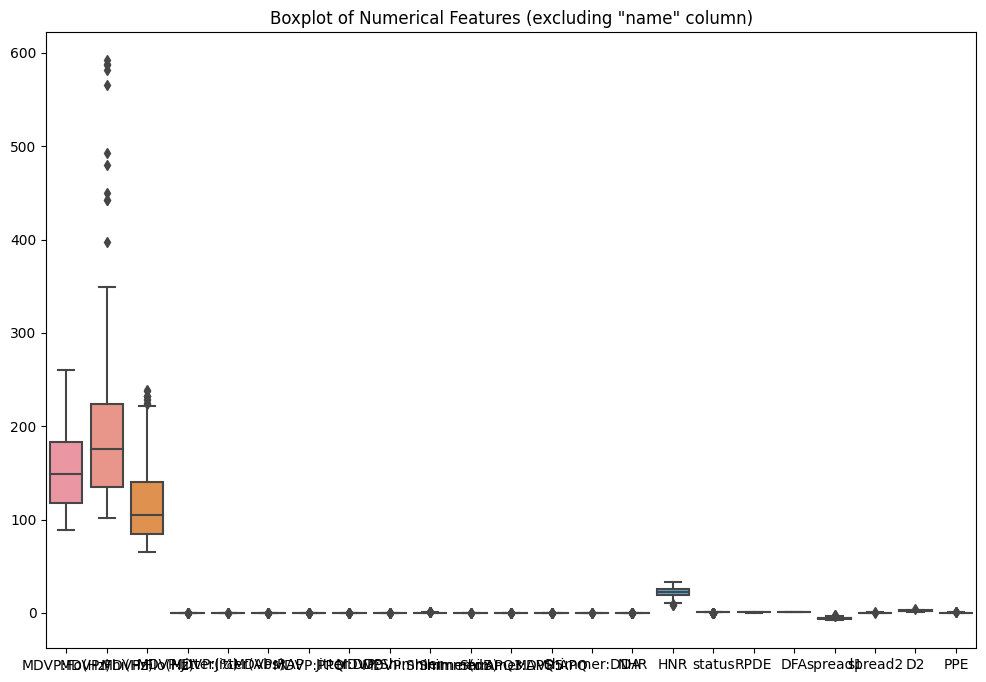

In [89]:
# Assuming your DataFrame is named df
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the 'name' column if present
numerical_columns = numerical_columns[numerical_columns != 'name']

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Features (excluding "name" column)')
plt.show()

In [90]:
# List of columns to check for outliers
columns_to_check = df.columns  # You can choose specific columns if needed

# Exclude columns starting with "name_phon_"
columns_to_check = [col for col in columns_to_check if not col.startswith('name_phon_')]

# Iterate through each column and identify outliers using IQR
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Column: {column}, Number of Outliers: {len(outliers)}")
    # If you want, you can print or inspect the actual rows with outliers: print(outliers)

Column: MDVP:Fo(Hz), Number of Outliers: 0
Column: MDVP:Fhi(Hz), Number of Outliers: 11
Column: MDVP:Flo(Hz), Number of Outliers: 9
Column: MDVP:Jitter(%), Number of Outliers: 14
Column: MDVP:Jitter(Abs), Number of Outliers: 7
Column: MDVP:RAP, Number of Outliers: 14
Column: MDVP:PPQ, Number of Outliers: 15
Column: Jitter:DDP, Number of Outliers: 14
Column: MDVP:Shimmer, Number of Outliers: 8
Column: MDVP:Shimmer(dB), Number of Outliers: 10
Column: Shimmer:APQ3, Number of Outliers: 6
Column: Shimmer:APQ5, Number of Outliers: 13
Column: MDVP:APQ, Number of Outliers: 12
Column: Shimmer:DDA, Number of Outliers: 6
Column: NHR, Number of Outliers: 19
Column: HNR, Number of Outliers: 3
Column: status, Number of Outliers: 48
Column: RPDE, Number of Outliers: 0
Column: DFA, Number of Outliers: 0
Column: spread1, Number of Outliers: 4
Column: spread2, Number of Outliers: 2
Column: D2, Number of Outliers: 1
Column: PPE, Number of Outliers: 5


In [91]:
# List of columns to check for outliers
columns_to_check = df.columns  # You can choose specific columns if needed

# Exclude columns starting with "name_phon_"
columns_to_check = [col for col in columns_to_check if not col.startswith('name_phon_')]

# Dictionary to store indices of outliers for each column
outliers_indices = {}

# Iterate through each column and identify outliers using IQR
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Store the indices of outliers
    outliers_indices[column] = outliers.index

    # Exclude outliers from the original dataframe
    df = df[~df.index.isin(outliers.index)]

# Print the excluded indices for each column
for column, indices in outliers_indices.items():
    print(f"Column: {column}, Excluded Indices: {indices.tolist()}")

Column: MDVP:Fo(Hz), Excluded Indices: []
Column: MDVP:Fhi(Hz), Excluded Indices: [73, 102, 115, 116, 117, 118, 120, 149, 186, 187, 193]
Column: MDVP:Flo(Hz), Excluded Indices: [43, 44, 45, 46, 166, 167, 170]
Column: MDVP:Jitter(%), Excluded Indices: [98, 99, 100, 101, 146, 147, 148, 150, 151, 152, 157, 192]
Column: MDVP:Jitter(Abs), Excluded Indices: [4, 79, 97]
Column: MDVP:RAP, Excluded Indices: [68]
Column: MDVP:PPQ, Excluded Indices: [1, 2, 3, 5]
Column: Jitter:DDP, Excluded Indices: []
Column: MDVP:Shimmer, Excluded Indices: [87, 88, 90, 91, 93, 141]
Column: MDVP:Shimmer(dB), Excluded Indices: [18]
Column: Shimmer:APQ3, Excluded Indices: [69, 138]
Column: Shimmer:APQ5, Excluded Indices: [0, 137]
Column: MDVP:APQ, Excluded Indices: [19, 21, 22, 136]
Column: Shimmer:DDA, Excluded Indices: [71]
Column: NHR, Excluded Indices: [20, 84, 89, 153, 154, 158, 164, 189, 194]
Column: HNR, Excluded Indices: []
Column: status, Excluded Indices: []
Column: RPDE, Excluded Indices: []
Column: DFA

In [92]:
# Define columns_to_exclude
columns_to_exclude = [col for col in df.columns if 'name_phon' in col]

# Assuming df is your DataFrame, and 'status' is the target variable
X = df.drop(['status'] + columns_to_exclude, axis=1)  # Features (all columns except 'status' and 'name_phon')
y = df['status']  # Target variable

# Split the data into training, test, and cross-validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_cv shape:", X_cv.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_cv shape:", y_cv.shape)

X_train shape: (100, 22)
X_test shape: (12, 22)
X_cv shape: (13, 22)
y_train shape: (100,)
y_test shape: (12,)
y_cv shape: (13,)


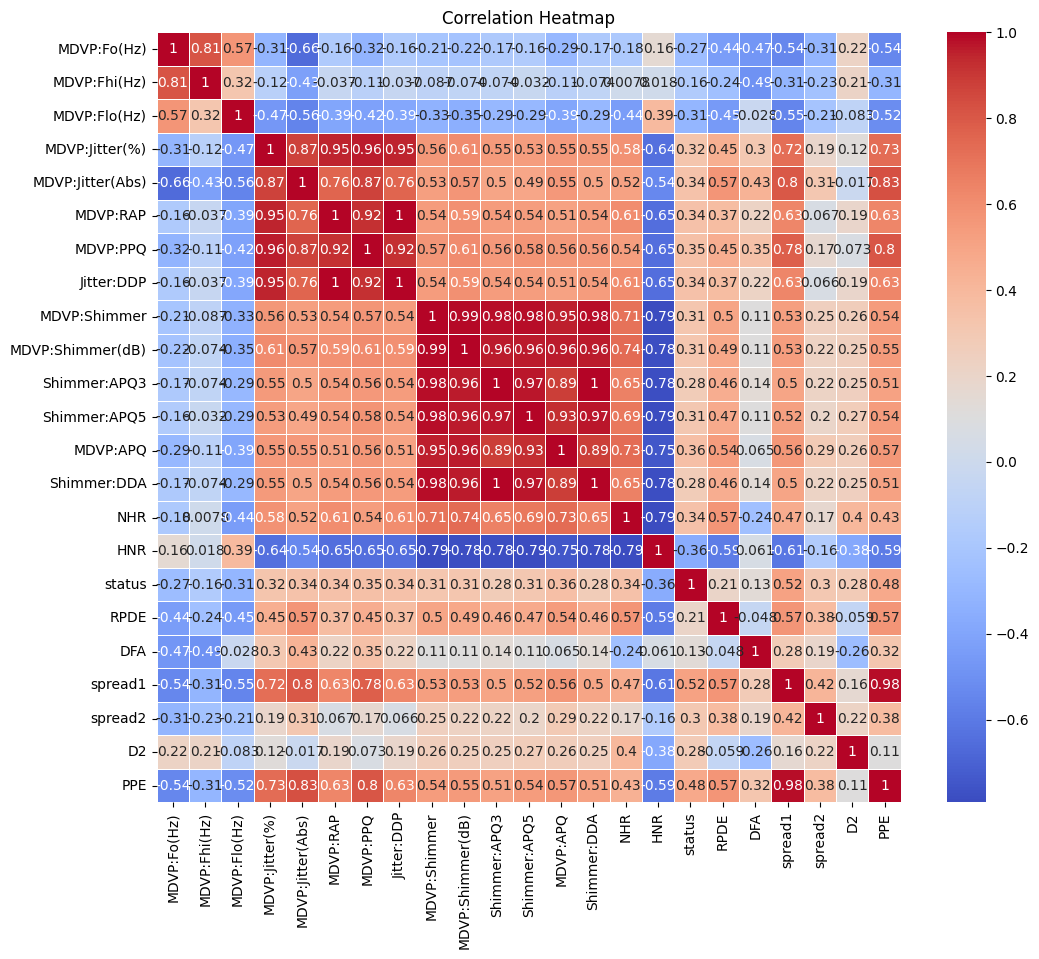

In [93]:
# Exclude 'name_phon' columns from the correlation matrix
columns_to_exclude = [col for col in df.columns if 'name_phon' in col]
correlation_matrix = df.drop(columns=columns_to_exclude).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [94]:
# Assuming df is your DataFrame, and 'status' is the target variable
X = df.drop(['status'] + columns_to_exclude, axis=1)  # Features (all columns except 'status' and 'name_phon')
y = df['status']  # Target variable

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Choose the desired number of features
X_rfe = rfe.fit_transform(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['MDVP:Fo(Hz)', 'MDVP:RAP', 'spread1', 'D2', 'PPE'], dtype='object')


In [96]:
# Assuming 'status' is your target variable
X = df[selected_features]  # Use the selected features from RFE
y = df['status']

# Split the data into training, testing, and cross-validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_cv_pred = rf_classifier.predict(X_cv)

# Evaluate the performance on the cross-validation set
accuracy_cv = accuracy_score(y_cv, y_cv_pred)
precision_cv = precision_score(y_cv, y_cv_pred)
recall_cv = recall_score(y_cv, y_cv_pred)
f1_cv = f1_score(y_cv, y_cv_pred)
conf_matrix_cv = confusion_matrix(y_cv, y_cv_pred)

# Display the evaluation metrics for cross-validation set
print("Cross-Validation Set Metrics:")
print("Accuracy:", accuracy_cv)
print("Precision:", precision_cv)
print("Recall:", recall_cv)
print("F1 Score:", f1_cv)
print("\nConfusion Matrix:\n", conf_matrix_cv)

# Make predictions on the testing set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the performance on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the evaluation metrics for the testing set
print("\nTesting Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("\nConfusion Matrix:\n", conf_matrix_test)

Cross-Validation Set Metrics:
Accuracy: 0.7692307692307693
Precision: 0.8888888888888888
Recall: 0.8
F1 Score: 0.8421052631578948

Confusion Matrix:
 [[2 1]
 [2 8]]

Testing Set Metrics:
Accuracy: 0.8333333333333334
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9

Confusion Matrix:
 [[1 2]
 [0 9]]


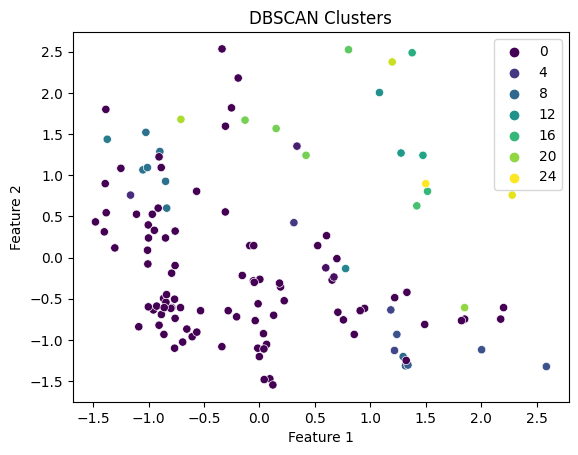

In [98]:
# Assuming X is your feature matrix

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1)
labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis')
plt.title("DBSCAN Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [99]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1)
labels = dbscan.fit_predict(X_scaled)

# Filter out noise points
X_no_noise = X[labels != -1]

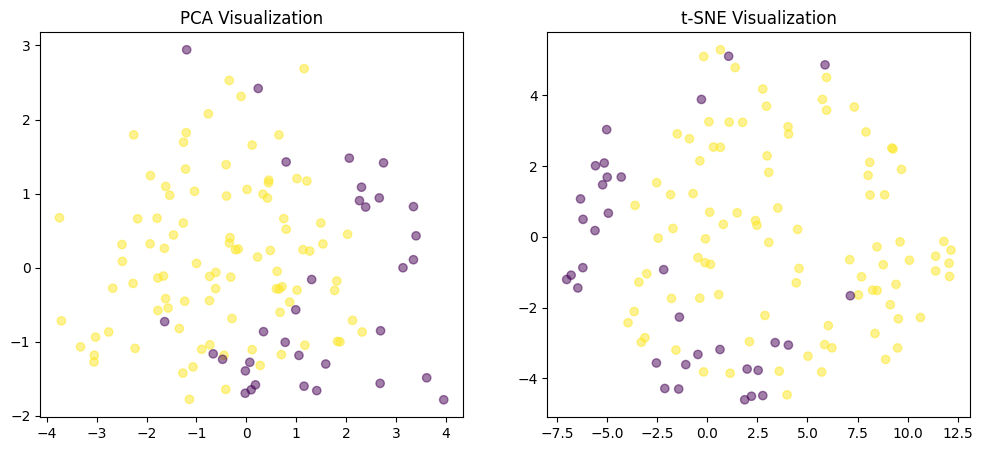

In [100]:
# Assuming X is your feature matrix

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1)
labels = dbscan.fit_predict(X_scaled)

# Filter out noise points
X_filtered = X_scaled[labels != -1]
y_filtered = y[labels != -1]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_filtered)

# Create DataFrames for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
df_visualization = pd.concat([df_pca, df_tsne, y_filtered], axis=1)

# Visualize PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y_filtered, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization')

# Visualize t-SNE
plt.subplot(1, 2, 2)
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=y_filtered, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization')

plt.show()

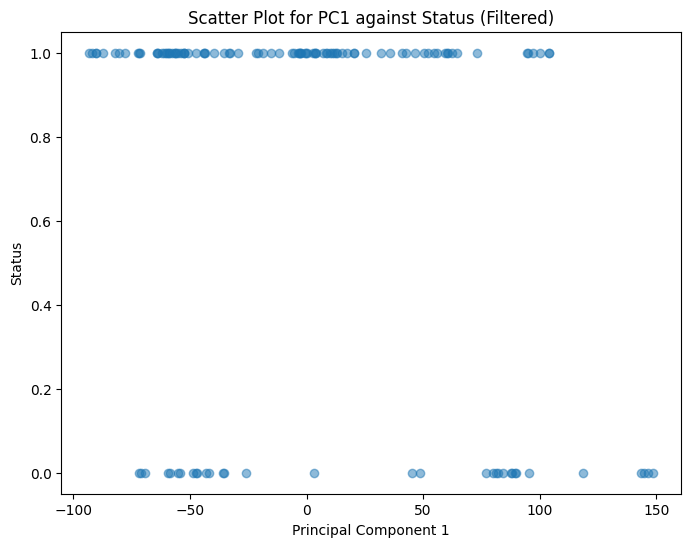

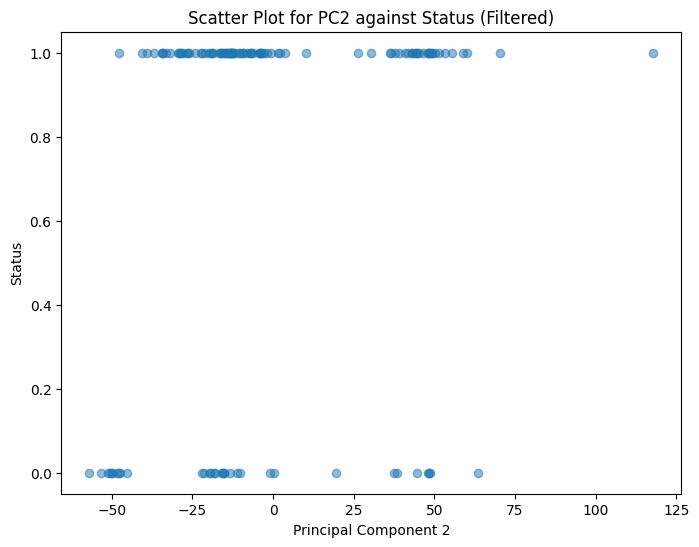

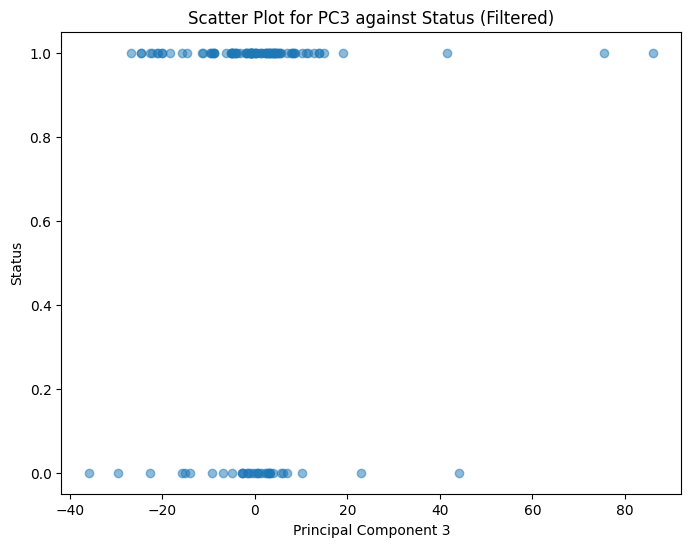

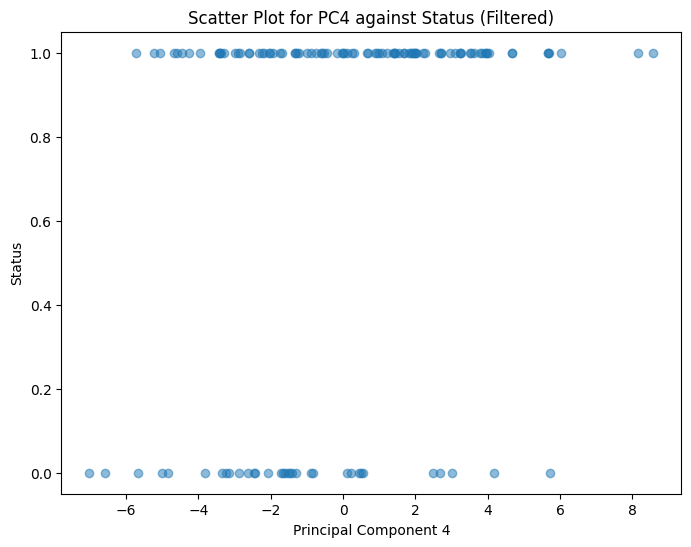

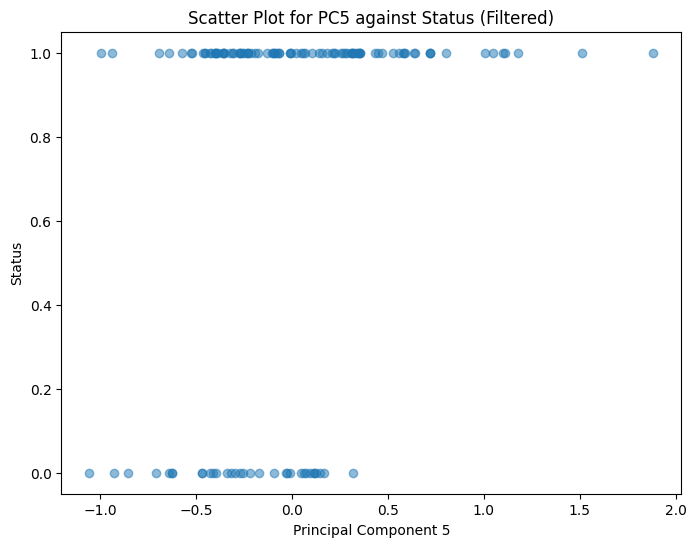

In [129]:
# Assuming X_pca is your transformed data after PCA
# Assuming y is your target variable (status)

# Filter out noise points using DBSCAN labels
X_filtered = X[dbscan.labels_ != -1]
y_filtered = y[dbscan.labels_ != -1]

# Assuming X_filtered is your filtered feature matrix
n_components = min(X_filtered.shape[0], X_filtered.shape[1])
pca = PCA(n_components=n_components)

# Fit and transform the feature matrix
X_pca_filtered = pca.fit_transform(X_filtered)

# Select the first 5 principal components
n_components_to_plot = min(5, n_components)

# Combine the selected principal components with the target variable
pca_df_filtered = pd.DataFrame(data=X_pca_filtered[:, :n_components_to_plot], columns=[f'PC{i}' for i in range(1, n_components_to_plot + 1)])
pca_df_filtered['status'] = y_filtered.values

# Plot individual scatter plots for the first 5 principal components
for i in range(n_components_to_plot):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df_filtered[f'PC{i+1}'], pca_df_filtered['status'], alpha=0.5)
    plt.title(f'Scatter Plot for PC{i+1} against Status (Filtered)')
    plt.xlabel(f'Principal Component {i+1}')
    plt.ylabel('Status')
    plt.show()

In [130]:
# Assuming X_train, X_test, y_train, y_test are your training and testing sets
# Initialize PCA with 3 components
pca = PCA(n_components=5)

# Fit and transform PCA on training set
X_train_pca = pca.fit_transform(X_train)

# Fit PCA on training set and transform test set
X_test_pca = pca.transform(X_test)

# Specify the hyperparameters and their potential values to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a custom scoring dictionary for evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scoring, refit='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_pca)

# Display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
# Check if 'name_phon' column exists before dropping
if 'name_phon' in df.columns:
    # Exclude features with correlation greater than 0.7 or less than -0.7
    correlation_matrix = df.drop('name_phon', axis=1).corr().abs()
    upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
    to_drop = [column for column in correlation_matrix.columns if any((correlation_matrix[column] > 0.7) | (correlation_matrix[column] < -0.7))]
    df = df.drop(columns=to_drop)
else:
    print("'name_phon' column not found in the DataFrame.")

# Assuming 'status' is your target variable
X = df.drop('status', axis=1)  # Features (all columns except 'status')
y = df['status']

# Split the data into training, testing, and cross-validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Perform correlation analysis and exclude highly correlated features
correlation_matrix = X_train.corr().abs()
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
to_drop = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > 0.7)]
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_cv = X_cv.drop(columns=to_drop)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the performance on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Make predictions on the cross-validation set
y_cv_pred = rf_classifier.predict(X_cv)

# Evaluate the performance on the cross-validation set
accuracy_cv = accuracy_score(y_cv, y_cv_pred)
precision_cv = precision_score(y_cv, y_cv_pred)
recall_cv = recall_score(y_cv, y_cv_pred)
f1_cv = f1_score(y_cv, y_cv_pred)
conf_matrix_cv = confusion_matrix(y_cv, y_cv_pred)

# Display the evaluation metrics for the testing set
print("Testing Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("\nConfusion Matrix:\n", conf_matrix_test)

# Display the evaluation metrics for the cross-validation set
print("\nCross-Validation Set Metrics:")
print("Accuracy:", accuracy_cv)
print("Precision:", precision_cv)
print("Recall:", recall_cv)
print("F1 Score:", f1_cv)
print("\nConfusion Matrix:\n", conf_matrix_cv)

'name_phon' column not found in the DataFrame.
Testing Set Metrics:
Accuracy: 0.75
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571

Confusion Matrix:
 [[0 3]
 [0 9]]

Cross-Validation Set Metrics:
Accuracy: 0.7692307692307693
Precision: 0.7692307692307693
Recall: 1.0
F1 Score: 0.8695652173913044

Confusion Matrix:
 [[ 0  3]
 [ 0 10]]


In [ ]:
# Assuming 'status' is your target variable
X = df.drop('status', axis=1)
y = df['status']

# Split the data into training, test, and cross-validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFE
num_features_to_select = 15  # Adjust as needed
rfe = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select)

# Fit RFE on the training set
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]

# Train the model on the training set
rf_classifier.fit(X_train_rfe, y_train)

# Make predictions on the cross-validation set
X_val_rfe = rfe.transform(X_val)
y_pred_val = rf_classifier.predict(X_val_rfe)

# Evaluate the performance on the cross-validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Display results for cross-validation set
print("Cross-Validation Set:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("\nConfusion Matrix:\n", conf_matrix_val)

# Make predictions on the test set
X_test_rfe = rfe.transform(X_test)
y_pred_test = rf_classifier.predict(X_test_rfe)

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display results for the test set
print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("\nConfusion Matrix:\n", conf_matrix_test)

Cross-Validation Set:
Accuracy: 0.8333333333333334
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9

Confusion Matrix:
 [[1 2]
 [0 9]]

Test Set:
Accuracy: 0.8461538461538461
Precision: 0.9
Recall: 0.9
F1 Score: 0.9

Confusion Matrix:
 [[2 1]
 [1 9]]


In [147]:
# Assuming df is your DataFrame, and 'status' is the target variable
X = df.drop(['status'], axis=1)  # Features (all columns except 'status' and 'name_phon')
y = df['status']  # Target variable

# Perform correlation analysis and exclude highly correlated features
if 'name_phon' in df.columns:
    # Exclude features with correlation greater than 0.7 or less than -0.7
    correlation_matrix = df.drop('name_phon', axis=1).corr().abs()
    upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
    to_drop = [column for column in correlation_matrix.columns if any((correlation_matrix[column] > 0.7) | (correlation_matrix[column] < -0.7))]
    df = df.drop(columns=to_drop)
else:
    print("'name_phon' column not found in the DataFrame.")

# Apply DBSCAN on the original features
dbscan = DBSCAN(eps=0.5, min_samples=1)
labels = dbscan.fit_predict(X)

# Filter out noise points using DBSCAN labels
X_filtered = X_pca[dbscan.labels_ != -1]
y_filtered = y[dbscan.labels_ != -1]

# Assuming X_filtered is your filtered feature matrix
n_components = min(X_filtered.shape[0], X_filtered.shape[1])
pca = PCA(n_components=n_components)

# Fit and transform the feature matrix
X_pca_filtered = pca.fit_transform(X_filtered)

# Combine the principal components with the target variable
pca_df_filtered = pd.DataFrame(data=X_pca_filtered, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_df_filtered['status'] = y_filtered.values

# Initialize the Random Forest classifier with the best hyperparameters
best_params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
rf_classifier_combined = RandomForestClassifier(random_state=42, **best_params)

# Convert X_pca_filtered to a DataFrame and drop the 'status' column
X_pca_df_filtered = pd.DataFrame(X_pca_filtered, columns=[f'PC{i}' for i in range(1, n_components + 1)])
X_pca_df_filtered['status'] = y_filtered.values

# Split the data into training, test, and cross-validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_pca_df_filtered.drop('status', axis=1), X_pca_df_filtered['status'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model on the training set
rf_classifier_combined.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_pred_val = rf_classifier_combined.predict(X_val)

# Evaluate the performance on the cross-validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Display results for cross-validation set
print("Cross-Validation Set:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("\nConfusion Matrix:\n", conf_matrix_val)

# Make predictions on the test set
y_pred_test = rf_classifier_combined.predict(X_test)

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display results for the test set
print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("\nConfusion Matrix:\n", conf_matrix_test)

'name_phon' column not found in the DataFrame.
Cross-Validation Set:
Accuracy: 0.8333333333333334
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9

Confusion Matrix:
 [[1 2]
 [0 9]]

Test Set:
Accuracy: 0.8461538461538461
Precision: 0.9
Recall: 0.9
F1 Score: 0.9

Confusion Matrix:
 [[2 1]
 [1 9]]


In [163]:
# Assuming you have df with true labels in 'true_labels' and predicted labels in 'predicted_labels'
y_true = df['status'].values
y_pred = df['status'].values

correct_predictions = []
incorrect_predictions = []

# Iterate through instances and categorize them
for index, (true_label, pred_label) in enumerate(zip(y_true, y_pred)):
    if len(correct_predictions) == 10 and len(incorrect_predictions) == 10:
        break

    if true_label == pred_label and len(correct_predictions) < 10:
        correct_predictions.append(index)
    elif true_label != pred_label and len(incorrect_predictions) < 10:
        incorrect_predictions.append(index)

# Assuming X is your feature matrix
# Display information for 10 correct predictions
print("Correct Predictions:")
for index in correct_predictions:
    instance_features = df.iloc[index, :]  # Fix: Use iloc on the DataFrame
    print(f"Index: {index}, True Label: {y_true[index]}, Predicted Label: {y_pred[index]}")
    print(instance_features)
    print("\n")

# Display information for 10 incorrect predictions
print("Incorrect Predictions:")
for index in incorrect_predictions:
    instance_features = df.iloc[index, :]  # Fix: Use iloc on the DataFrame
    print(f"Index: {index}, True Label: {y_true[index]}, Predicted Label: {y_pred[index]}")
    print(instance_features)
    print("\n")

Correct Predictions:
Index: 0, True Label: 1, Predicted Label: 1
MDVP:Fo(Hz)            120.26700
MDVP:Fhi(Hz)           137.24400
MDVP:Flo(Hz)           114.82000
MDVP:Jitter(%)           0.00333
MDVP:Jitter(Abs)         0.00003
                         ...    
name_phon_R01_S50_2      0.00000
name_phon_R01_S50_3      0.00000
name_phon_R01_S50_4      0.00000
name_phon_R01_S50_5      0.00000
name_phon_R01_S50_6      0.00000
Name: 6, Length: 218, dtype: float64


Index: 1, True Label: 1, Predicted Label: 1
MDVP:Fo(Hz)            107.33200
MDVP:Fhi(Hz)           113.84000
MDVP:Flo(Hz)           104.31500
MDVP:Jitter(%)           0.00290
MDVP:Jitter(Abs)         0.00003
                         ...    
name_phon_R01_S50_2      0.00000
name_phon_R01_S50_3      0.00000
name_phon_R01_S50_4      0.00000
name_phon_R01_S50_5      0.00000
name_phon_R01_S50_6      0.00000
Name: 7, Length: 218, dtype: float64


Index: 2, True Label: 1, Predicted Label: 1
MDVP:Fo(Hz)             95.73000
MDVP:Fhi(H

In [161]:
# Assuming you have df with true labels in 'true_labels' and predicted labels in 'predicted_labels'
y_true = df['status'].values
y_pred = df['status'].values

incorrect_predictions = []

# Iterate through instances and categorize incorrect predictions
for index, (true_label, pred_label) in enumerate(zip(y_true, y_pred)):
    if len(incorrect_predictions) == 10:
        break

    if true_label != pred_label:
        incorrect_predictions.append(index)

# Assuming X is your feature matrix
# Display information for 10 incorrect predictions
print("Incorrect Predictions:")
for index in incorrect_predictions:
    instance_features = df.iloc[index, :]  # Fix: Use iloc on the DataFrame
    print(f"Index: {index}, True Label: {y_true[index]}, Predicted Label: {y_pred[index]}")
    print(instance_features)
    print("\n")

# Check if there were less than 10 incorrect predictions
if len(incorrect_predictions) < 10:
    print("Less than 10 incorrect predictions found.")

Incorrect Predictions:
Less than 10 incorrect predictions found.


# New Section